In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('full_df.csv')

In [7]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [ ]:
import seaborn as sns
sns.set(style="whitegrid")


In [ ]:
import ast


labels_order = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
df['labels'] = df['labels'].str.extract(r"\['([A-Z])'\]")
df['target'] = df['target'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['target_index'] = df['target'].apply(lambda x: x.index(1))

df['expected_label'] = df['target_index'].apply(lambda i: labels_order[i])

df['match'] = df['labels'] == df['expected_label']

C:\Users\HP\AppData\Local\Temp\ipykernel_27428\2666045018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=df, order=labels_order, palette='Set2')


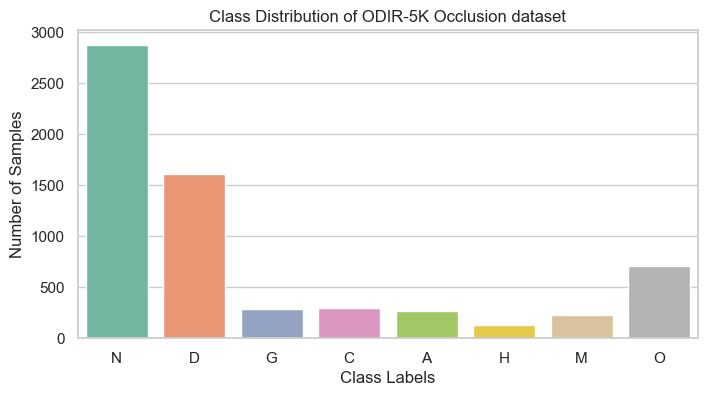

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.countplot(x='labels', data=df, order=labels_order, palette='Set2')
plt.title('Class Distribution of ODIR-5K Occlusion dataset')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()


Age Distribution by Class

C:\Users\HP\AppData\Local\Temp\ipykernel_27428\66421979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='Patient Age', data=df, order=labels_order, palette='Set3')


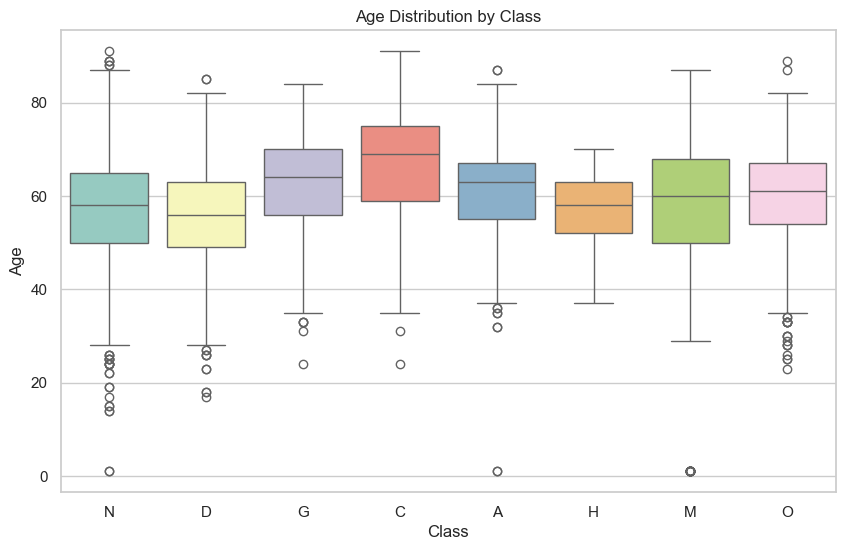

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='labels', y='Patient Age', data=df, order=labels_order, palette='Set3')
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

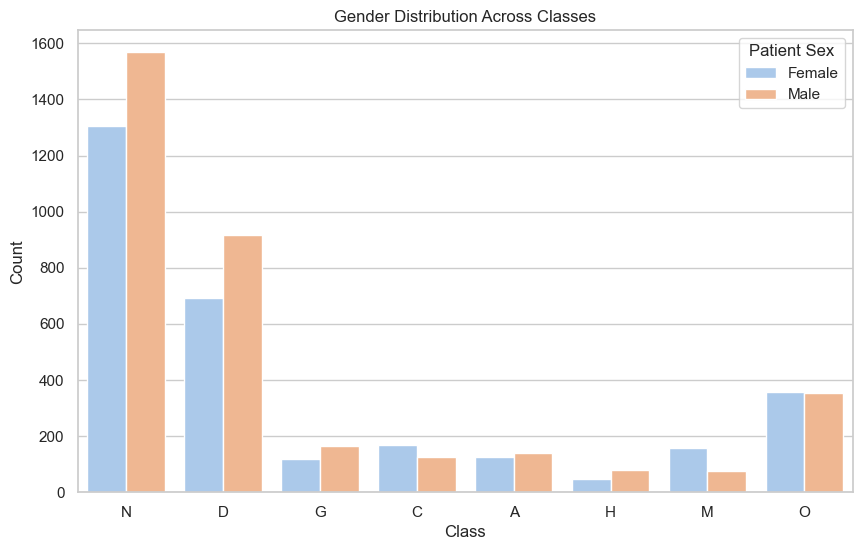

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='labels', hue='Patient Sex', data=df, order=labels_order, palette='pastel')
plt.title('Gender Distribution Across Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Flattening images from high dimensional data to low dimensional data. 
Flattening is carried out bcoz the algorithms like SVM expects the data to be input in the form of (sample X features) where sample = no of rows and features is the no of columns.

In [23]:
from PIL import Image
import numpy as np
import os

image_folder = 'preprocessed_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

flattened_images = []
for idx, file in enumerate(image_files):
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')  
    img_array = np.array(img)
    if idx ==0:
        print('original shape of first image:', img_array.shape) # printing the shape of the first image without flattenign it 
    flat_vector = img_array.flatten() # reducing high dimensional data to low dimensional data 
    flattened_images.append(flat_vector)
# Each row of X is one flattened image and Each column is one feature(pixel value)
X = np.array (flattened_images)
print("Shape after flattening all images:", X.shape)

original shape of first image: (512, 512, 3)
Shape after flattening all images: (6392, 786432)
